# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [3]:
orders=pd.read_csv("D:\data set\Sales Project.csv")

In [70]:
orders.head(5)

,Unnamed: 0,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin,Order Priority
0,0,20847,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,5,4,13.01,88522,7,1,2015,1.760563,0.54,High
1,1,20228,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,4390,12,6362.85,90193,13,6,2015,8.762825,0.60,Not Specified
2,2,21776,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,-54,22,211.15,90192,15,2,2015,-5.696203,0.45,Critical
3,3,24844,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,803,16,1164.45,86838,12,5,2015,10.204600,0.43,Medium
4,4,24846,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,-24,7,22.23,86838,12,5,2015,-7.317073,0.56,Medium


In [5]:
orders.columns

Index(['Unnamed: 0', 'Row ID', 'Order Priority', 'Discount', 'Unit Price',
       'Shipping Cost', 'Customer ID', 'Customer Name', 'Ship Mode',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Container', 'Product Name', 'Product Base Margin', 'Country',
       'Region', 'State or Province', 'City', 'Postal Code', 'Order Date',
       'Ship Date', 'Profit', 'Quantity ordered new', 'Sales', 'Order ID',
       'Day', 'Month', 'Year', 'POUPP'],
      dtype='object')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1952 non-null   int64  
 1   Row ID                1952 non-null   int64  
 2   Order Priority        1952 non-null   object 
 3   Discount              1952 non-null   float64
 4   Unit Price            1952 non-null   float64
 5   Shipping Cost         1952 non-null   float64
 6   Customer ID           1952 non-null   int64  
 7   Customer Name         1952 non-null   object 
 8   Ship Mode             1952 non-null   object 
 9   Customer Segment      1952 non-null   object 
 10  Product Category      1952 non-null   object 
 11  Product Sub-Category  1952 non-null   object 
 12  Product Container     1952 non-null   object 
 13  Product Name          1952 non-null   object 
 14  Product Base Margin   1952 non-null   float64
 15  Country              

# Cleaning Data

**Null Values**

In [7]:
orders.isnull().any()

Unnamed: 0              False
Row ID                  False
Order Priority          False
Discount                False
Unit Price              False
Shipping Cost           False
Customer ID             False
Customer Name           False
Ship Mode               False
Customer Segment        False
Product Category        False
Product Sub-Category    False
Product Container       False
Product Name            False
Product Base Margin     False
Country                 False
Region                  False
State or Province       False
City                    False
Postal Code             False
Order Date              False
Ship Date               False
Profit                  False
Quantity ordered new    False
Sales                   False
Order ID                False
Day                     False
Month                   False
Year                    False
POUPP                   False
dtype: bool

In [8]:
orders.isnull().sum()

Unnamed: 0              0
Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Day                     0
Month                   0
Year                    0
POUPP                   0
dtype: int64

In [9]:
#fill with 0
orders_with_0=orders['Product Base Margin'].fillna(0)

In [10]:
orders_with_0

0       0.54
1       0.60
2       0.45
3       0.43
4       0.56
        ... 
1947    0.59
1948    0.60
1949    0.60
1950    0.57
1951    0.65
Name: Product Base Margin, Length: 1952, dtype: float64

In [11]:
orders_with_0.isnull().sum()

0

In [12]:
#fill with 
orders_with_mean=orders['Product Base Margin'].fillna(orders['Product Base Margin'].mean())

In [13]:
orders_with_mean

0       0.54
1       0.60
2       0.45
3       0.43
4       0.56
        ... 
1947    0.59
1948    0.60
1949    0.60
1950    0.57
1951    0.65
Name: Product Base Margin, Length: 1952, dtype: float64

In [14]:
orders.shape

(1952, 30)

In [15]:
orders.isnull().sum().sum()

0

In [16]:
#drop Null
orders_drop=orders.dropna()

In [17]:
orders_drop.shape

(1952, 30)

In [18]:
orders_drop=orders.dropna(how='all')

In [19]:
orders_drop.shape

(1952, 30)

In [20]:
del orders['Product Base Margin']

In [21]:
Product_Base_Margin=orders_with_mean

In [22]:
orders=pd.concat([orders,Product_Base_Margin],axis=1)
orders

,Unnamed: 0,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,...,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin
0,0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,...,8/1/2015,5,4,13.01,88522,7,1,2015,1.760563,0.54
1,1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,...,15/6/2015,4390,12,6362.85,90193,13,6,2015,8.762825,0.60
2,2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,...,17/2/2015,-54,22,211.15,90192,15,2,2015,-5.696203,0.45
3,3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,...,14/5/2015,803,16,1164.45,86838,12,5,2015,10.204600,0.43
4,4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,...,13/5/2015,-24,7,22.23,86838,12,5,2015,-7.317073,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,...,12/3/2015,-117,18,207.31,87536,11,3,2015,-10.733945,0.59
1948,1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,...,12/3/2015,-161,22,143.12,87536,11,3,2015,-20.150188,0.60
1949,1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,...,31/3/2015,-42,5,59.98,87534,29,3,2015,-3.508772,0.60
1950,1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,...,4/4/2015,-25,15,135.78,87537,4,4,2015,-2.665245,0.57


**Duplicated Values**

In [23]:
duplicated=orders.duplicated('Row ID')
duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
1947    False
1948    False
1949    False
1950    False
1951    False
Length: 1952, dtype: bool

In [24]:
orders.drop_duplicates()

,Unnamed: 0,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,...,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin
0,0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,...,8/1/2015,5,4,13.01,88522,7,1,2015,1.760563,0.54
1,1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,...,15/6/2015,4390,12,6362.85,90193,13,6,2015,8.762825,0.60
2,2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,...,17/2/2015,-54,22,211.15,90192,15,2,2015,-5.696203,0.45
3,3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,...,14/5/2015,803,16,1164.45,86838,12,5,2015,10.204600,0.43
4,4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,...,13/5/2015,-24,7,22.23,86838,12,5,2015,-7.317073,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,...,12/3/2015,-117,18,207.31,87536,11,3,2015,-10.733945,0.59
1948,1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,...,12/3/2015,-161,22,143.12,87536,11,3,2015,-20.150188,0.60
1949,1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,...,31/3/2015,-42,5,59.98,87534,29,3,2015,-3.508772,0.60
1950,1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,...,4/4/2015,-25,15,135.78,87537,4,4,2015,-2.665245,0.57


**Data Types**

In [25]:
orders.dtypes

Unnamed: 0                int64
Row ID                    int64
Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Customer Name            object
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Name             object
Country                  object
Region                   object
State or Province        object
City                     object
Postal Code               int64
Order Date               object
Ship Date                object
Profit                    int64
Quantity ordered new      int64
Sales                   float64
Order ID                  int64
Day                       int64
Month                     int64
Year                      int64
POUPP                   float64
Product Base Margin     float64
dtype: object

In [26]:
orders['Row ID'].dtype

dtype('int64')

In [27]:
orders['Row ID']=orders['Row ID'].astype(str)

In [28]:
orders['Row ID'].dtype

dtype('O')

In [29]:
orders['Customer ID']=orders['Customer ID'].astype(str)
orders['Customer ID'].dtypes

dtype('O')

In [30]:
orders['Postal Code']=orders['Postal Code'].astype(str)
orders['Postal Code'].dtypes

dtype('O')

In [31]:
orders['Order ID']=orders['Order ID'].astype(str)
orders['Order ID'].dtypes

dtype('O')

In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1952 non-null   int64  
 1   Row ID                1952 non-null   object 
 2   Order Priority        1952 non-null   object 
 3   Discount              1952 non-null   float64
 4   Unit Price            1952 non-null   float64
 5   Shipping Cost         1952 non-null   float64
 6   Customer ID           1952 non-null   object 
 7   Customer Name         1952 non-null   object 
 8   Ship Mode             1952 non-null   object 
 9   Customer Segment      1952 non-null   object 
 10  Product Category      1952 non-null   object 
 11  Product Sub-Category  1952 non-null   object 
 12  Product Container     1952 non-null   object 
 13  Product Name          1952 non-null   object 
 14  Country               1952 non-null   object 
 15  Region               

# Preprocessing Data

In [33]:
orders['City'].unique()

array(['Anacortes', 'San Gabriel', 'Roselle', 'Prior Lake', 'Smithtown',
       'Syracuse', 'Helena', 'Missoula', 'New York City', 'Laguna Niguel',
       'Lakewood', 'Grants Pass', 'Gresham', 'Redmond', 'Puyallup',
       'Tonawanda', 'Round Rock', 'Salem', 'Napa', 'Burlington', 'Canton',
       'Cincinnati', 'Vacaville', 'Vallejo', 'Terrytown', 'Chicago',
       'Manhattan', 'Biddeford', 'Boston', 'Dover', 'Lodi', 'Lake Oswego',
       'Mcminnville', 'Seattle', 'Layton', 'Tysons Corner', 'Alton',
       'Petaluma', 'Ansonia', 'Yarmouth', 'West Mifflin', 'Watauga',
       'Kingsport', 'Knoxville', 'Fort Collins', 'Richland', 'Lebanon',
       'Baton Rouge', 'Fort Lee', 'San Francisco', 'Arlington',
       'Gainesville', 'Arlington Heights', 'Aurora', 'Lehi',
       'Overland Park', 'Detroit', 'Bartlesville', 'Troy', 'Utica',
       'Murray', 'Mint Hill', 'Orland Park', 'Newton', 'Louisville',
       'Fountain', 'Grand Junction', 'Maryville', 'Richfield',
       'Highlands Ranch', 'Han

In [34]:
orders['City'].value_counts()

City
New York City    47
Los Angeles      44
Seattle          21
Boston           19
Washington       15
                 ..
Waterville        1
Fayetteville      1
Biloxi            1
Palm Coast        1
Cheyenne          1
Name: count, Length: 869, dtype: int64

In [35]:
orders.columns

Index(['Unnamed: 0', 'Row ID', 'Order Priority', 'Discount', 'Unit Price',
       'Shipping Cost', 'Customer ID', 'Customer Name', 'Ship Mode',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Container', 'Product Name', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID', 'Day', 'Month',
       'Year', 'POUPP', 'Product Base Margin'],
      dtype='object')

In [36]:
orders['State or Province'].value_counts()

State or Province
California              214
New York                129
Texas                   124
Florida                 123
Illinois                 88
Ohio                     81
Michigan                 66
Washington               61
Indiana                  53
Pennsylvania             52
Minnesota                51
Virginia                 51
North Carolina           49
Massachusetts            46
Colorado                 44
Georgia                  44
Tennessee                41
Wisconsin                39
Utah                     38
Iowa                     38
Maryland                 34
New Jersey               32
Arizona                  31
South Carolina           30
Oregon                   28
Missouri                 27
Maine                    27
Kansas                   27
Alabama                  22
Kentucky                 22
Arkansas                 22
Louisiana                20
Connecticut              20
Idaho                    20
Nebraska                 18
Ok

In [37]:
orders['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', '0'],
      dtype=object)

In [38]:
pr=orders['Order Priority'].tolist()

In [39]:
for i in range(0,1952):
    if pr[i]=='Critical ':
        pr[i]='Critical'

In [40]:
priority=pd.DataFrame(pr,columns=['Order Priority'])

In [41]:
priority['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', '0'],
      dtype=object)

In [42]:
pr=priority['Order Priority']

In [43]:
del orders['Order Priority']

In [44]:
orders=pd.concat([orders,pr],axis=1)
orders

,Unnamed: 0,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin,Order Priority
0,0,20847,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,5,4,13.01,88522,7,1,2015,1.760563,0.54,High
1,1,20228,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,4390,12,6362.85,90193,13,6,2015,8.762825,0.60,Not Specified
2,2,21776,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,-54,22,211.15,90192,15,2,2015,-5.696203,0.45,Critical
3,3,24844,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,803,16,1164.45,86838,12,5,2015,10.204600,0.43,Medium
4,4,24846,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,-24,7,22.23,86838,12,5,2015,-7.317073,0.56,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1947,19842,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,-117,18,207.31,87536,11,3,2015,-10.733945,0.59,High
1948,1948,19843,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,-161,22,143.12,87536,11,3,2015,-20.150188,0.60,High
1949,1949,26208,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,-42,5,59.98,87534,29,3,2015,-3.508772,0.60,Not Specified
1950,1950,24911,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,-25,15,135.78,87537,4,4,2015,-2.665245,0.57,Medium


In [45]:
orders.columns

Index(['Unnamed: 0', 'Row ID', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Country', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Day', 'Month', 'Year',
       'POUPP', 'Product Base Margin', 'Order Priority'],
      dtype='object')

In [46]:
orders['Customer Segment'].unique()

array(['Corporate', 'Home Office', 'Small Business', 'Consumer'],
      dtype=object)

In [47]:
orders['Customer Segment'].value_counts()

Customer Segment
Corporate         684
Home Office       470
Consumer          410
Small Business    388
Name: count, dtype: int64

In [48]:
orders['Product Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [49]:
orders[['Day','Month','Year']]=orders['Order Date'].str.split('/',expand=True)

In [50]:
orders.loc[:,['Order Date','Year','Month','Day']]

,Order Date,Year,Month,Day
0,7/1/2015,2015,1,7
1,13/6/2015,2015,6,13
2,15/2/2015,2015,2,15
3,12/5/2015,2015,5,12
4,12/5/2015,2015,5,12
...,...,...,...,...
1947,11/3/2015,2015,3,11
1948,11/3/2015,2015,3,11
1949,29/3/2015,2015,3,29
1950,4/4/2015,2015,4,4


In [51]:
orders['Year'].dtype

dtype('O')

# Analysis & Visualization

In [52]:
orders.sample(10)

,Unnamed: 0,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin,Order Priority
1751,1751,19756,0.00,65.99,5.99,3084,Debbie Hsu,Express Air,Small Business,Technology,...,314,14,798.89,89879,20,4,2015,4.758297,0.58,High
1557,1557,24523,0.10,5.18,5.74,2773,Christina Zhu,Regular Air,Corporate,Office Supplies,...,-29,2,10.96,91584,26,3,2015,-5.598456,0.36,Not Specified
1037,1037,19141,0.06,6.48,5.14,1852,Joy Kaplan McNeill,Express Air,Home Office,Office Supplies,...,-28,10,68.34,86847,19,3,2015,-4.320988,0.37,Not Specified
1235,1235,18820,0.01,13.43,5.50,2240,Maurice Kelly,Express Air,Corporate,Office Supplies,...,-313,7,99.75,89102,6,4,2015,-23.306031,0.57,Low
483,483,24764,0.09,349.45,60.00,868,Sharon Ellis,Delivery Truck,Corporate,Furniture,...,-2946,12,3918.98,91195,6,3,2015,-8.430391,0.00,Critical
107,107,20521,0.09,30.73,4.00,191,Gerald Kearney,Regular Air,Corporate,Technology,...,-100,7,203.49,89093,9,4,2015,-3.254149,0.75,Not Specified
1200,1200,22451,0.05,3.28,3.97,2164,Harry Sellers,Regular Air,Small Business,Office Supplies,...,-145,11,36.30,88794,9,1,2015,-44.207317,0.56,Not Specified
1305,1305,20905,0.07,195.99,4.20,2352,Kerry Beach,Regular Air,Consumer,Technology,...,-222,4,632.12,86165,20,6,2015,-1.132711,0.56,Critical
521,521,25678,0.03,8.04,8.94,920,Jessie Kelly,Regular Air,Consumer,Office Supplies,...,-160,9,76.77,90492,12,4,2015,-19.900498,0.40,High
394,394,1225,0.10,40.48,19.99,698,Nelson Hensley,Regular Air,Corporate,Technology,...,-580,36,1423.35,8994,7,4,2015,-14.328063,0.77,Low


In [53]:
#Profit over unit price percentage
orders['POUPP']=orders['Profit']/orders['Unit Price']
orders

,Unnamed: 0,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Profit,Quantity ordered new,Sales,Order ID,Day,Month,Year,POUPP,Product Base Margin,Order Priority
0,0,20847,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,5,4,13.01,88522,7,1,2015,1.760563,0.54,High
1,1,20228,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,4390,12,6362.85,90193,13,6,2015,8.762825,0.60,Not Specified
2,2,21776,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,-54,22,211.15,90192,15,2,2015,-5.696203,0.45,Critical
3,3,24844,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,803,16,1164.45,86838,12,5,2015,10.204600,0.43,Medium
4,4,24846,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,-24,7,22.23,86838,12,5,2015,-7.317073,0.56,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1947,19842,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,-117,18,207.31,87536,11,3,2015,-10.733945,0.59,High
1948,1948,19843,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,-161,22,143.12,87536,11,3,2015,-20.150188,0.60,High
1949,1949,26208,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,-42,5,59.98,87534,29,3,2015,-3.508772,0.60,Not Specified
1950,1950,24911,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,-25,15,135.78,87537,4,4,2015,-2.665245,0.57,Medium


<Axes: xlabel='Product Category'>

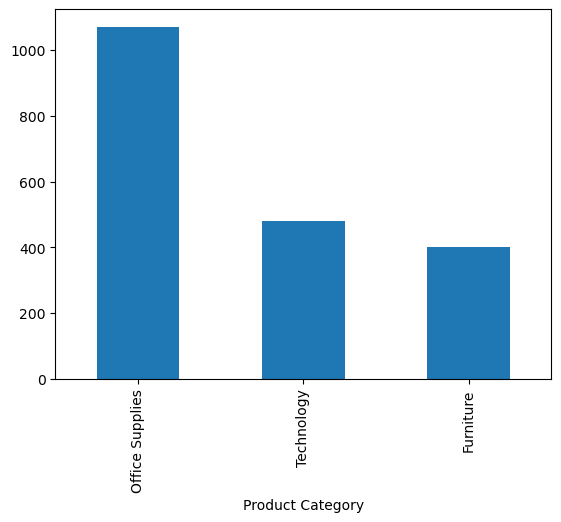

In [54]:
orders['Product Category'].value_counts().plot.bar()

In [55]:
orders['Month'].value_counts()

Month
1    370
3    328
4    321
2    314
5    313
6    306
Name: count, dtype: int64

In [56]:
orders.to_csv('Sales Project.csv')

# Exploratory Data Analysis (EDA)
In this section, we perform Univariate, Bivariate, and Numerical analysis to understand the dataset better.

## Univariate Analysis
We analyze individual features using countplots and histograms.

In [64]:
df = pd.read_csv('D:\data set\Sales Project.csv')

In [71]:
# ----------- Univariate Analysis: Categorical Variables ------------
categorical_cols = ['Ship Mode', 'Customer Segment', 'Product Category', 'Order Priority']


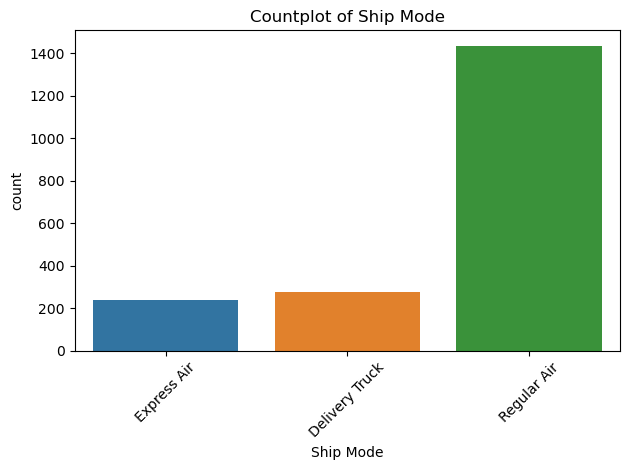

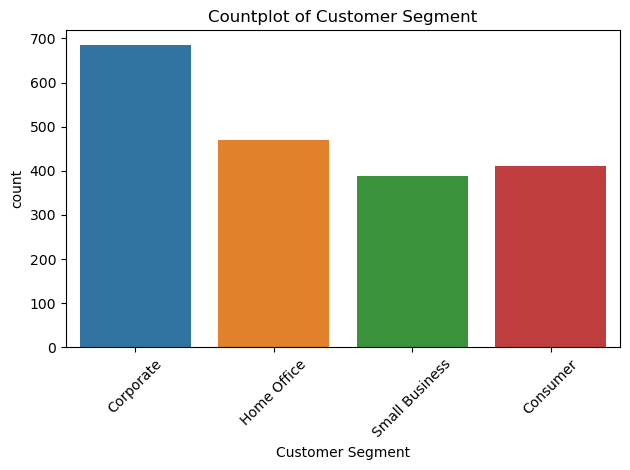

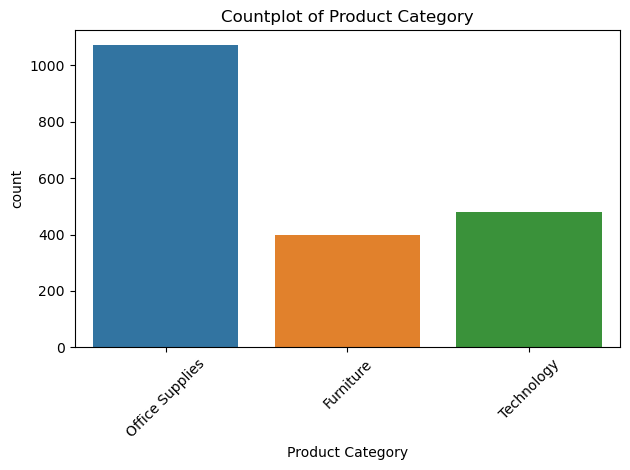

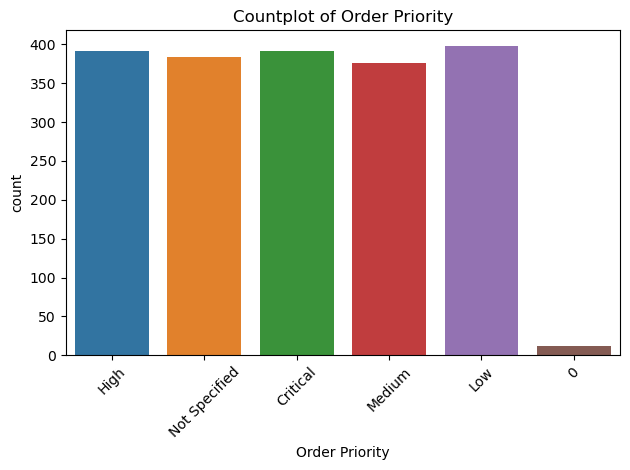

In [72]:
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)
    plt.title(f'Countplot of {predictor}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Bivariate Analysis
We explore the relationships between categorical features and the target variable (or other important variables).

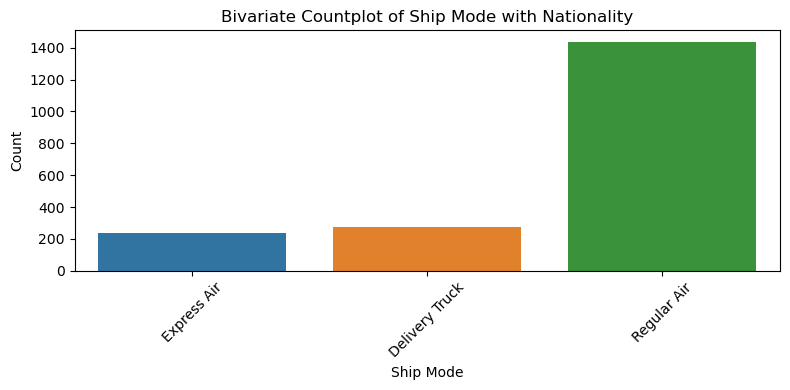

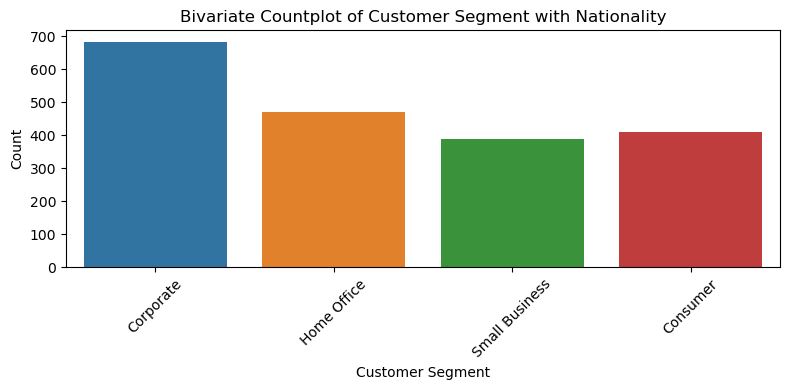

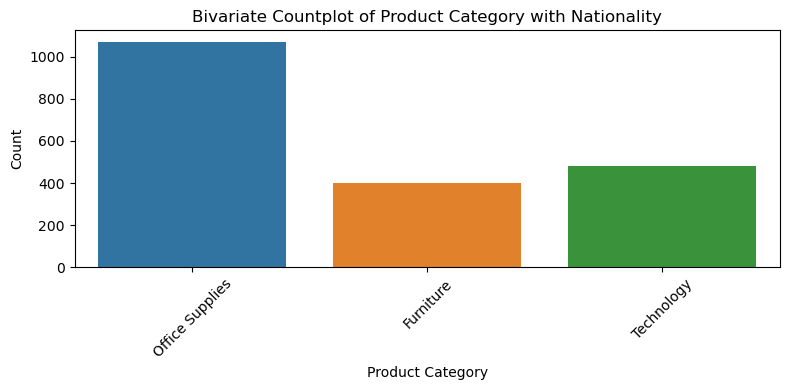

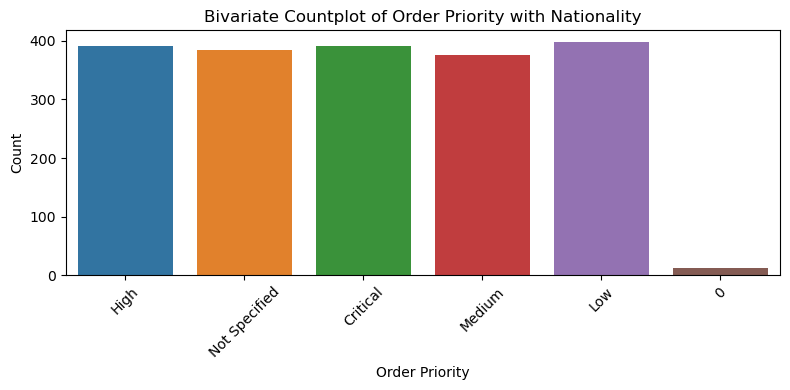

In [74]:
# ----------- Bivariate Analysis: Categorical Variables with hue='Nationality' ------------
for i, predictor in enumerate(categorical_cols):
    if predictor not in df.columns:
        continue  # skip if predictor is missing in df
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=predictor)
    plt.title(f'Bivariate Countplot of {predictor} with Nationality')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

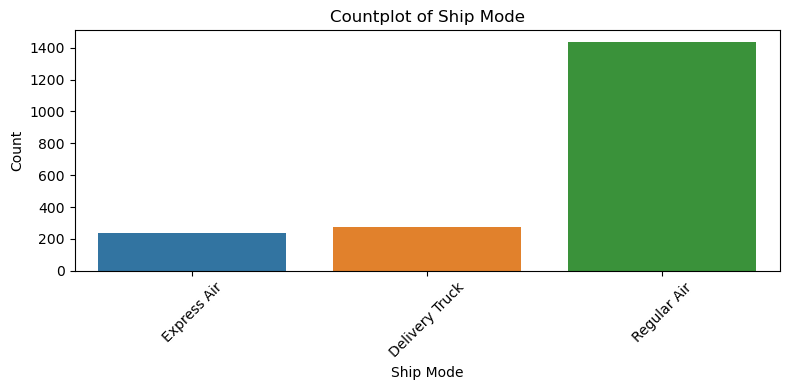

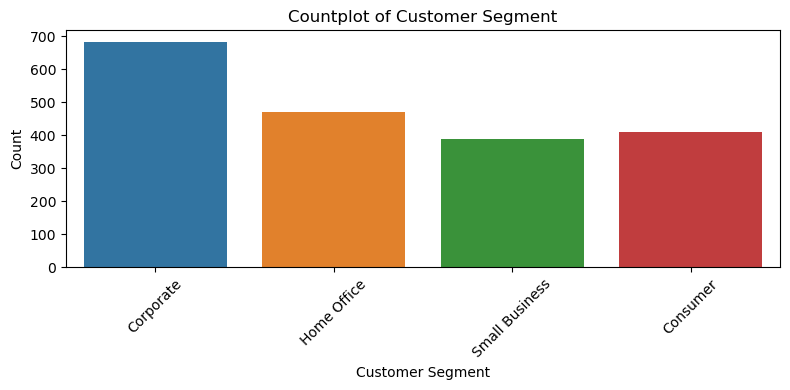

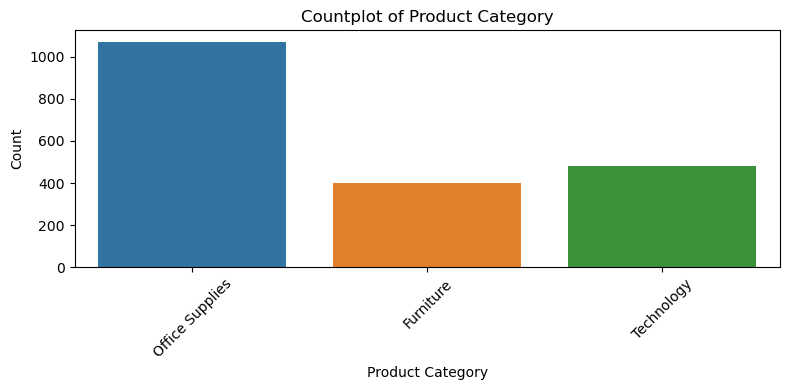

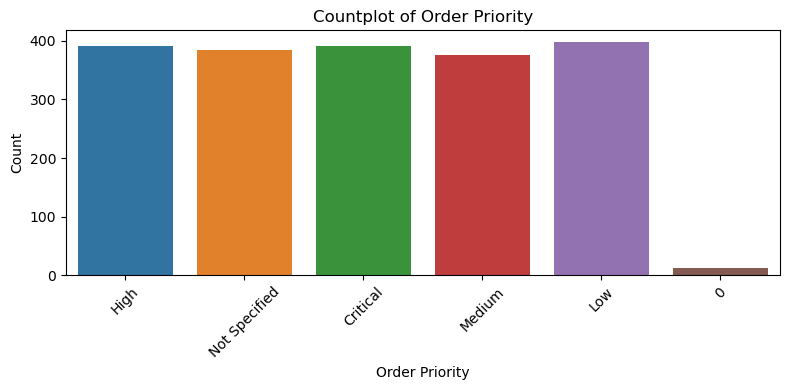

In [76]:
# ----------- Histogram for Categorical Columns except "Occupation" ------------
for col in categorical_cols:
    if col == "Occupation" or col not in df.columns:
        continue
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Machine Learning Model
We build a simple machine learning model (Logistic Regression) to predict a target variable using the available features.

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_2360\695373074.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Encode categorical columns
label_encoders = {col: LabelEncoder().fit(df[col]) for col in df.select_dtypes(include='object').columns}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])


In [ ]:
# Features and target
X = df.drop('Product Category', axis=1)
y = df['Product Category']

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Model training and prediction
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6650

Confusion Matrix:
 [[ 16  46  15]
 [  2 217   7]
 [  4  57  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.21      0.32        77
           1       0.68      0.96      0.79       226
           2       0.55      0.31      0.39        88

    accuracy                           0.66       391
   macro avg       0.65      0.49      0.50       391
weighted avg       0.66      0.66      0.61       391



In [93]:
# Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)


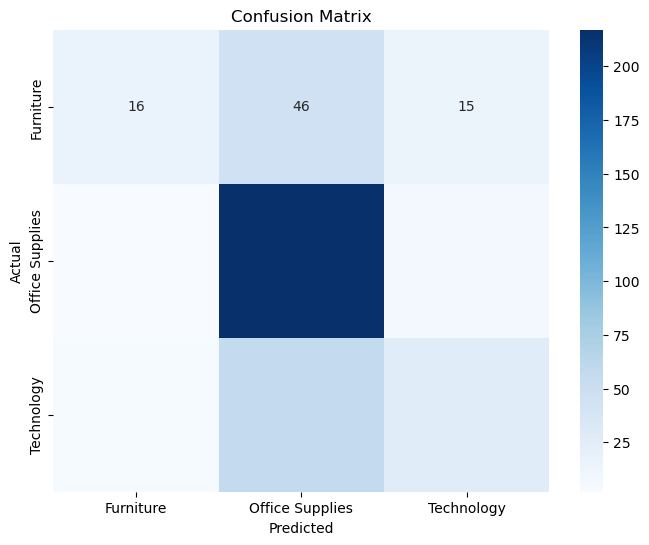

In [97]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Product Category'].classes_, yticklabels=label_encoders['Product Category'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
